<a href="https://colab.research.google.com/github/saintzema/AI-Currency-Predictor/blob/main/NGN_TO_USD_PREDICT_AI_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv('NGN-USD.csv')
from sklearn.linear_model import LinearRegression

#Creating a Close Table with the average price of the High & Low
data['Close'] = (data['High'] + data['Low']) / 2
print(data.head())
print(data.tail())



        Date  Price   Open   High    Low Volume Change %  Close
0  7/11/1995  82.25  82.25  82.25  82.25    NaN   -0.69%  82.25
1  7/12/1995  82.75  82.75  82.75  82.75    NaN    0.61%  82.75
2  7/13/1995  83.00  83.00  83.00  83.00    NaN    0.30%  83.00
3  7/14/1995  83.25  83.25  83.25  83.25    NaN    0.30%  83.25
4  7/17/1995  83.75  83.75  83.75  83.75    NaN    0.60%  83.75
          Date    Price     Open     High      Low Volume Change %     Close
7487  5/1/2024  1389.00  1390.00  1394.26  1390.00    NaN    0.00%  1392.130
7488  5/2/2024  1349.90  1390.52  1397.26  1350.90    NaN   -2.81%  1374.080
7489  5/3/2024  1382.50  1372.95  1409.42  1372.95    NaN    2.41%  1391.185
7490  5/5/2024  1393.74  1382.50  1393.74  1382.50    NaN    0.81%  1388.120
7491  5/6/2024  1406.34  1393.74  1406.34  1391.34    NaN    0.90%  1398.840


In [6]:
train_data = data[data["Volume"].notna()]

#Convert Volume column to numeric, handling 'K' for thousands
def convert_volume(volume):
    if isinstance(volume, str) and 'K' in volume:
        return float(volume.replace('K', '')) * 1000
    elif isinstance(volume, str):
        return float(volume) #Assuming other strings are convertible tofloat
    else:
        return volume

train_data['Volume'] = train_data['Volume'].apply(convert_volume)
data['Volume'] = data['Volume'].apply(convert_volume)

model = LinearRegression()

#fit model using Close as predicator and volume as target
model.fit(train_data[['Close']], train_data['Volume'])

#Check if there are any NaN values in Volume before predicting
if data['Volume'].isna().any():
    #predicting volume for rows with NaN values
    predicted_volumes = model.predict(data[data['Volume'].isna()][['Close']])

    #filling NaN values in Volume with predicted values
    data.loc[data['Volume'].isna(), 'Volume'] = predicted_volumes
else:
    print("No NaN values found in Volume column.")



<ipython-input-6-270173f487b1>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
print(data.head())

        Date  Price   Open   High    Low    Volume Change %  Close
0  7/11/1995  82.25  82.25  82.25  82.25  5.413797   -0.69%  82.25
1  7/12/1995  82.75  82.75  82.75  82.75  5.428552    0.61%  82.75
2  7/13/1995  83.00  83.00  83.00  83.00  5.435930    0.30%  83.00
3  7/14/1995  83.25  83.25  83.25  83.25  5.443307    0.30%  83.25
4  7/17/1995  83.75  83.75  83.75  83.75  5.458062    0.60%  83.75


In [8]:
print(data.isnull().sum())
# data=data.dropna()
print(data.describe())

Date        0
Price       0
Open        0
High        0
Low         0
Volume      0
Change %    0
Close       0
dtype: int64
             Price         Open         High          Low       Volume  \
count  7492.000000  7492.000000  7492.000000  7492.000000  7492.000000   
mean    211.450359   211.578215   213.141618   210.210842     9.233125   
std     180.192616   180.280079   184.516057   174.439988     5.878164   
min      74.900000    74.900000    74.900000    74.900000     0.000000   
25%     117.815000   117.815000   117.815000   117.815000     6.461244   
50%     150.400000   150.400000   150.400000   150.400000     7.416768   
75%     305.300000   305.300000   306.725000   305.000000    10.000000   
max    1629.660000  1630.660000  1680.750000  1585.500000    50.209212   

             Close  
count  7492.000000  
mean    211.676230  
std     179.336888  
min      74.900000  
25%     117.815000  
50%     150.400000  
75%     306.560000  
max    1600.240000  


In [9]:
data['Close'] = (data['High'] + data['Low']) / 2
print(data.head())
print(data.describe())

        Date  Price   Open   High    Low    Volume Change %  Close
0  7/11/1995  82.25  82.25  82.25  82.25  5.413797   -0.69%  82.25
1  7/12/1995  82.75  82.75  82.75  82.75  5.428552    0.61%  82.75
2  7/13/1995  83.00  83.00  83.00  83.00  5.435930    0.30%  83.00
3  7/14/1995  83.25  83.25  83.25  83.25  5.443307    0.30%  83.25
4  7/17/1995  83.75  83.75  83.75  83.75  5.458062    0.60%  83.75
             Price         Open         High          Low       Volume  \
count  7492.000000  7492.000000  7492.000000  7492.000000  7492.000000   
mean    211.450359   211.578215   213.141618   210.210842     9.233125   
std     180.192616   180.280079   184.516057   174.439988     5.878164   
min      74.900000    74.900000    74.900000    74.900000     0.000000   
25%     117.815000   117.815000   117.815000   117.815000     6.461244   
50%     150.400000   150.400000   150.400000   150.400000     7.416768   
75%     305.300000   305.300000   306.725000   305.000000    10.000000   
max   

In [10]:
figure = px.line(data, x='Date', y='Close', title='USD/NGN Exchange Rate Over Time')
figure.show()

In [11]:
#Let's add year and month columns in the data

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
print(data.head())

        Date  Price   Open   High    Low    Volume Change %  Close  Year  \
0 1995-07-11  82.25  82.25  82.25  82.25  5.413797   -0.69%  82.25  1995   
1 1995-07-12  82.75  82.75  82.75  82.75  5.428552    0.61%  82.75  1995   
2 1995-07-13  83.00  83.00  83.00  83.00  5.435930    0.30%  83.00  1995   
3 1995-07-14  83.25  83.25  83.25  83.25  5.443307    0.30%  83.25  1995   
4 1995-07-17  83.75  83.75  83.75  83.75  5.458062    0.60%  83.75  1995   

   Month  
0      7  
1      7  
2      7  
3      7  
4      7  


In [12]:
#Now let's look at the aggregated yearly growht of the conversion rates between NGN and USD

import plotly.graph_objs as go
import plotly.io as pio

#calculate the yearly growth

growth = data.groupby('Year').agg({'Close':lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index, y=growth['Close'], name='Yearly Growth'))

fig.update_layout(title='Yearly Growth of USD/NGN Exchange Rate', xaxis_title='Year', yaxis_title='Growth(%)', width=900, height=600)

pio.show(fig)

In [13]:
#Now lets calculate monthly growth of the conversion rates between NGN and USD

data['Growth'] = data.groupby(["Year", 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

#Group data by Month and calculate average growth
grouped_data = data.groupby('Month')['Growth'].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
    ))

fig.update_layout(
    title = "Aggregated Monthly Growth of NGN-USD Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth(%)",
    width=900,
    height=600
)
pio.show(fig)

We can see that the value of USD always rises and becomes stronger in June every year but falls below in August

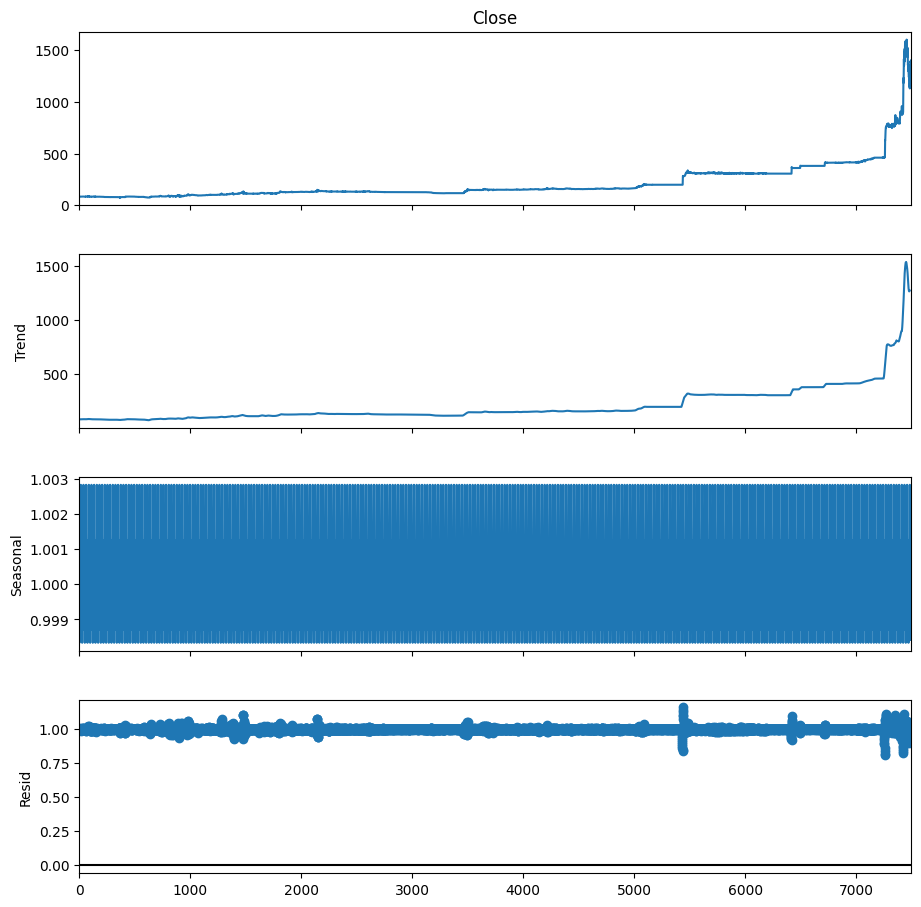

In [14]:
#Let's Forecast the Exchange Rate Using Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], model='multiplicative', period=24)
fig = result.plot()
fig.set_size_inches(10,10)
fig.show()

We can see that there's a seasonal pattern in this data. So SARIMA will be the most appropriate algorithm for this data. But first we need to find the p,d, and q values using pmdarima library.

In [15]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [16]:
import pandas as pd
data = pd.read_csv('NGN-USD.csv', index_col='Date', parse_dates=True)
data['Close'] = (data['High'] + data['Low']) / 2

from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal = True, m=24, suppress_warnings=True)
print(model.order)

So the p,d and q values are 2,1,2


In [17]:
#Using SARIMA to train a model to forecast currency exchange rates
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Using the p,d,q values
model = SARIMAX(data['Close'], order=(2,1,2), seasonal_order=(2,1,2,24))
fitted = model.fit()
print(fitted.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 7492
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 24)   Log Likelihood              -24044.608
Date:                            Mon, 14 Oct 2024   AIC                          48107.215
Time:                                    17:30:14   BIC                          48169.479
Sample:                                         0   HQIC                         48128.601
                                           - 7492                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0783      0.005     14.907      0.000       0.068       0.089
ar.L2          0.7237      0.006   

In [25]:
#Now let's make predictions about the future exchange rates for the next 10 years
future_dates = pd.date_range(start='2025-01-01', end='2035-12-31', freq='D')
predictions = fitted.predict(start=len(data), end=len(data) + len(future_dates) - 1)
predictions.index = future_dates
print(predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



2025-01-01     1401.828132
2025-01-02     1446.549611
2025-01-03     1463.675432
2025-01-04     1479.846696
2025-01-05     1466.470835
                  ...     
2035-12-27    12828.355886
2035-12-28    12836.887974
2035-12-29    12845.499768
2035-12-30    12851.853929
2035-12-31    12847.738831
Freq: D, Name: predicted_mean, Length: 4017, dtype: float64


In [26]:
#To Visualize the forecasted results
import plotly.graph_objs as go
import pandas as pd
data = pd.read_csv('NGN-USD.csv', index_col='Date', parse_dates=True)
data['Close'] = (data['High'] + data['Low']) / 2

#Create figure
fig = go.Figure()

#Add training data line plot
fig.add_trace(go.Scatter(
      x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

#Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line = dict(color='red')
))
fig.update_layout(
    title='USD/NGN Exchange Rate Forecast',
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    width=900,
    height=600
)

pio.show(fig)

In [27]:
filtered_predictions = predictions[(predictions.index.year >= 2025) & (predictions.index.year <= 2035)]

for date, value in filtered_predictions.items():
    print(f"Year: {date.year}, Predicted Dollar Rate: {value:.2f}")

Year: 2025, Predicted Dollar Rate: 1401.83
Year: 2025, Predicted Dollar Rate: 1446.55
Year: 2025, Predicted Dollar Rate: 1463.68
Year: 2025, Predicted Dollar Rate: 1479.85
Year: 2025, Predicted Dollar Rate: 1466.47
Year: 2025, Predicted Dollar Rate: 1492.65
Year: 2025, Predicted Dollar Rate: 1513.83
Year: 2025, Predicted Dollar Rate: 1533.77
Year: 2025, Predicted Dollar Rate: 1522.43
Year: 2025, Predicted Dollar Rate: 1531.10
Year: 2025, Predicted Dollar Rate: 1535.44
Year: 2025, Predicted Dollar Rate: 1567.62
Year: 2025, Predicted Dollar Rate: 1568.83
Year: 2025, Predicted Dollar Rate: 1564.55
Year: 2025, Predicted Dollar Rate: 1573.51
Year: 2025, Predicted Dollar Rate: 1539.01
Year: 2025, Predicted Dollar Rate: 1574.45
Year: 2025, Predicted Dollar Rate: 1581.63
Year: 2025, Predicted Dollar Rate: 1582.79
Year: 2025, Predicted Dollar Rate: 1591.35
Year: 2025, Predicted Dollar Rate: 1586.58
Year: 2025, Predicted Dollar Rate: 1610.39
Year: 2025, Predicted Dollar Rate: 1608.52
Year: 2025,